In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, PredictionErrorDisplay

In [7]:
df = pd.read_csv("../proc_data/ethylene_methane_reduced.csv")
X = df.drop('Conc_Meth', axis=1)
X = X.drop('Conc_Eth',axis=1)
X = X.drop('Time',axis=1)
y = df['Conc_Meth']
print(df.head())

   Unnamed: 0  feature1  feature2  feature3  Time  Conc_Meth  Conc_Eth
0           0 -2.504409  4.124434  4.110974  0.00        0.0       0.0
1           1 -2.508157  4.130002  4.111652  0.01        0.0       0.0
2           2 -2.506494  4.123014  4.020260  0.02        0.0       0.0
3           3 -2.526575  4.143718  4.018489  0.03        0.0       0.0
4           4 -2.496893  4.151425  4.219301  0.04        0.0       0.0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Linear Regression

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 2601.455518843546
R-squared (R2) Score: 0.5573706788522932


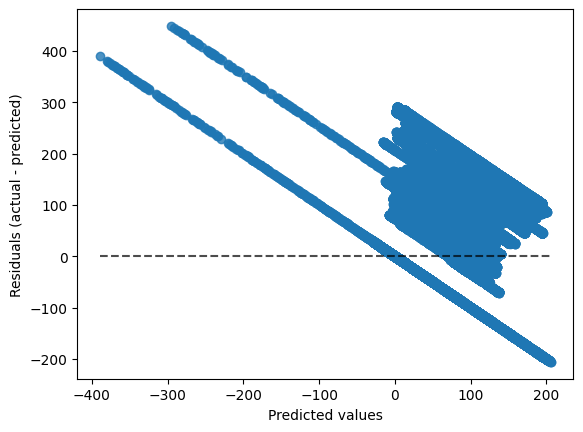

In [10]:
display = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred)
display.plot()
plt.show()

### LASSO Regression

In [11]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=1.0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 2602.7196490718525
R-squared (R2) Score: 0.5571555911443756


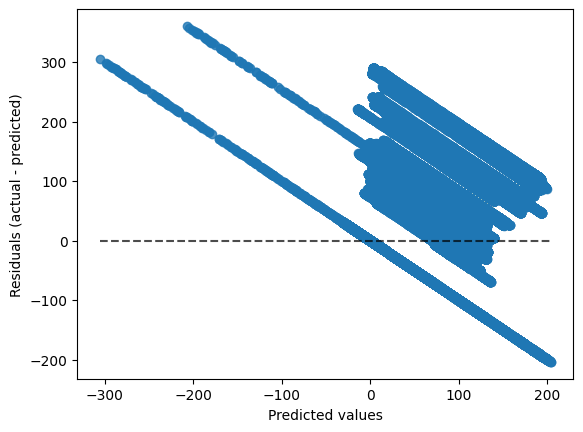

In [12]:
display = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred)
display.plot()
plt.show()

### Ridge Regression

In [13]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 2601.455517494609
R-squared (R2) Score: 0.5573706790818105


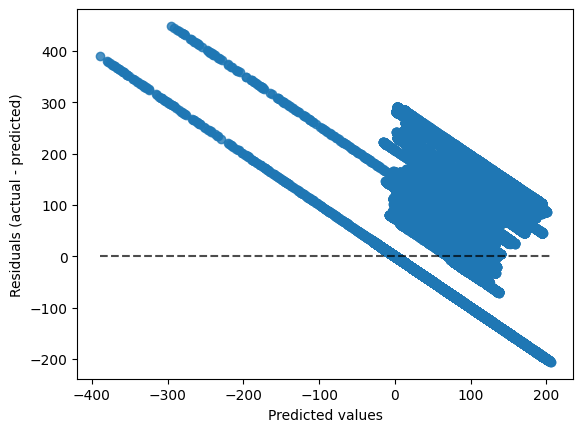

In [14]:
display = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred)
display.plot()
plt.show()

### Decision Tree Regression

In [15]:
from sklearn import tree

model = tree.DecisionTreeRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 16.731321972692875
R-squared (R2) Score: 0.9971532191755602


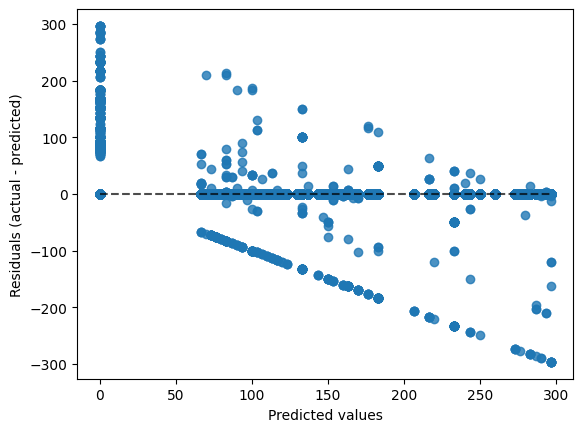

In [16]:
display = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred)
display.plot()
plt.show()

In [17]:
residuals = y_test - y_pred

mean_residual = np.mean(residuals)
variance_residual = np.var(residuals)
print(f"Mean of Residuals: {mean_residual}")
print(f"Variance of Residuals: {variance_residual}")

Mean of Residuals: 0.026989840504079803
Variance of Residuals: 16.730593521202437


### Polynomial Regression

In [18]:
from sklearn.preprocessing import PolynomialFeatures

degree = 4  # You can change this to the desired polynomial degree
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print("R-squared (R2) Score:", r2)

Mean Squared Error: 3253.203667751983
R-squared (R2) Score: 0.44647781959677213


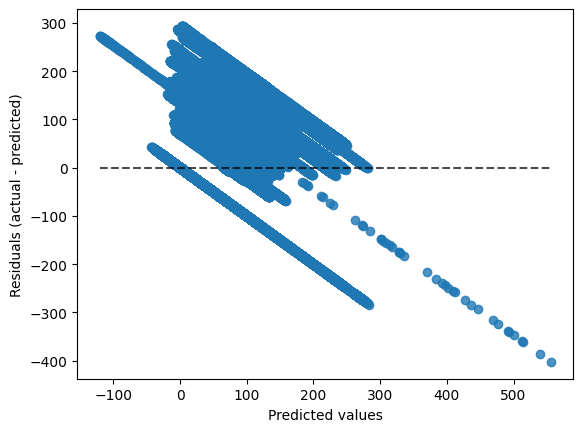

In [19]:
display = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred)
display.plot()
plt.show()